# Problem Statement : 
In order to predict how capable each applicant is of repaying a loan,using various statistical and machine learning methods to make these predictions

# Business Objectives
The case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

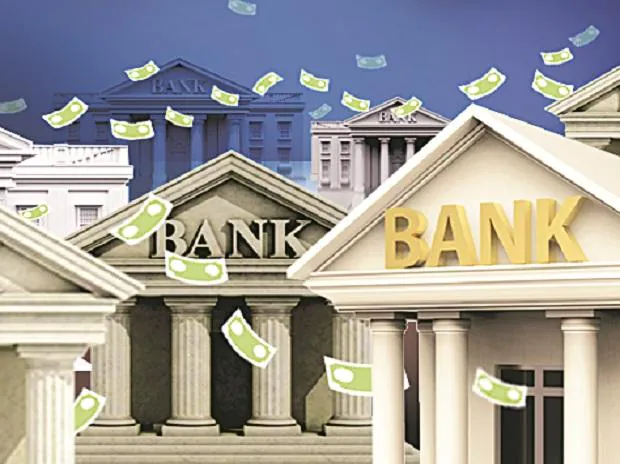

# Basic Terms

**Bank loan**-an amount of money loaned at interest by a bank to a borrower, usually on collateral security, for a certain period of time.

A loan is the money you receive from a bank or financial institution in exchange for a commitment to repay the principal amount with interest. Since lenders take the risk of a possible default, they charge a fee to offset this risk – and this fee is known as the interest. Loans typically are secured or unsecured.

Banks typically require a borrower to have good or excellent credit (690 or higher FICO), multiple years of credit history and a low debt-to-income ratio to take out a personal loan. If you don't think you'll qualify for a bank loan, look for ways to improve your credit or consider a co-signed or secured loan.

**Cash loan** is a type of personal loan which requires minimum documentation and the approval process is quick and speedy. The method is minimal and convenient compared to the traditional bank loans. Cash loans are also termed as personal loan, instant loan, money loan or quick loan.

**Revolving loan** facility is a form of credit issued by a financial institution that provides the borrower with the ability to draw down or withdraw, repay, and withdraw again. A revolving loan is considered a flexible financing tool due to its repayment and re-borrowing accommodations. It is not considered a term loan because, during an allotted period of time, the facility allows the borrower to repay the loan or take it out again. In contrast, a term loan provides a borrower with funds followed by a fixed payment schedule.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

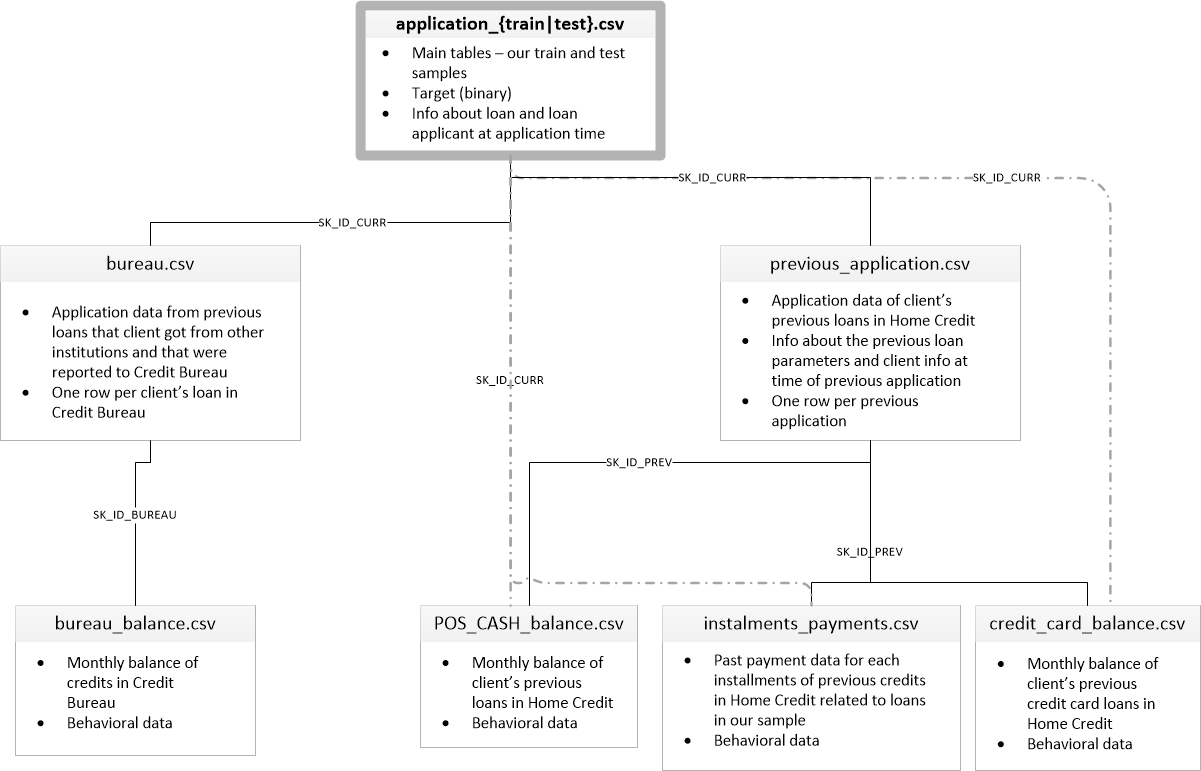

In [2]:
application= pd.read_csv('application_train.csv')

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Basic Checks

In [4]:
application.shape                                  # checking number of rows and columns

(307511, 122)

In [5]:
application.drop_duplicates(keep='first',inplace=True)          # checking data type information.
application.info(verbose =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
application.isnull().sum()                           # finding out total number of nll value present in the dataset.

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

# Feature Engineering

In [7]:
 # defining missing value definition to find out missing value ratio in various column.
    
def missing_value(data):            
    missing_v = data.isnull().sum().values
    total= len(data)
    ratio_missing = missing_v/total*100
    return pd.DataFrame(data={'column_name':data.columns.values, 'missing_ratio': ratio_missing})
    

In [8]:
missing_value(application).sort_values(['missing_ratio'], ascending=False)

,column_name,missing_ratio
76,COMMONAREA_MEDI,69.872297
48,COMMONAREA_AVG,69.872297
62,COMMONAREA_MODE,69.872297
70,NONLIVINGAPARTMENTS_MODE,69.432963
56,NONLIVINGAPARTMENTS_AVG,69.432963
84,NONLIVINGAPARTMENTS_MEDI,69.432963
86,FONDKAPREMONT_MODE,68.386172
68,LIVINGAPARTMENTS_MODE,68.354953
54,LIVINGAPARTMENTS_AVG,68.354953
82,LIVINGAPARTMENTS_MEDI,68.354953


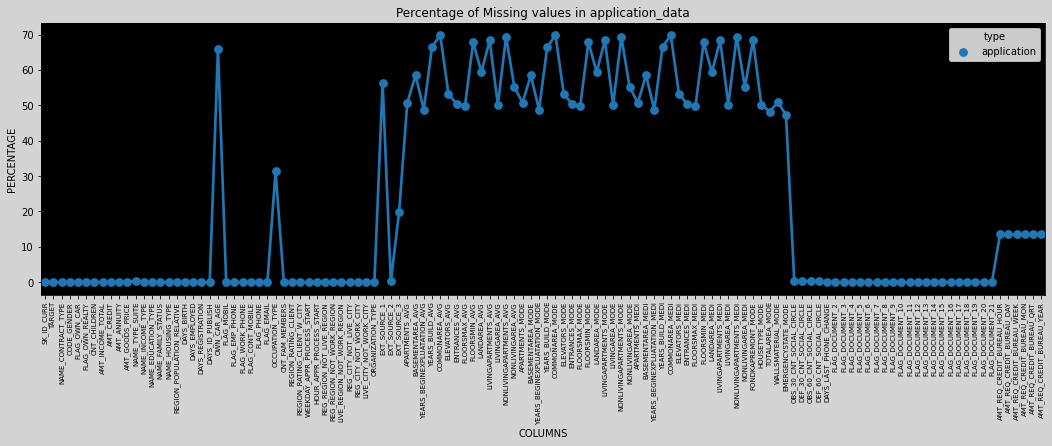

In [9]:
# plotting graph for missing value ratio in all columns.

fig = plt.figure(figsize=(18,5))
miss_application_data = pd.DataFrame((application.isnull().sum())*100/application.shape[0]).reset_index()
miss_application_data["type"] = "application"
ax = sns.pointplot("index",0,data=miss_application_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

<span style='color:blue'>**Removing columns with missing values more than 40%**.</span>
As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector.

In [10]:
# Dropping Columns with missing ratio more tha 40%.

application=application.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)

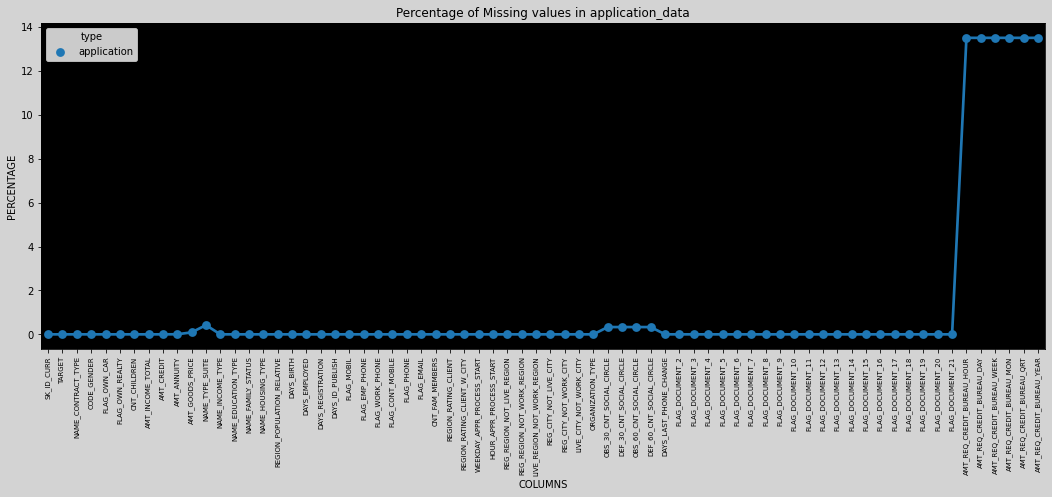

In [11]:
#plotting to see other missing ratios after dropping.

fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((application.isnull().sum())*100/application.shape[0]).reset_index()
miss_application_data["type"] = "application"
ax = sns.pointplot("index",0,data=miss_application_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

<span style='color:red'>Since some Columns have 'Nan' value of around 13.5%. We will rectify it using statistical mean.</span>

# MISSING values Suggestion

In [12]:
print('AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT :' ,application['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum())
print('AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT :' ,application['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())
print('AMT_REQ_CREDIT_BUREAU_WEEK NAN COUNT :', application['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())  
print('AMT_REQ_CREDIT_BUREAU_MON NaN COUNT : ', application['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())
print('AMT_REQ_CREDIT_BUREAU_QRT NAN COUNT: ', application['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())
print('AMT_REQ_CREDIT_BUREAU_YEAR NAN COUNT :', application['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT : 41519
AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT : 41519
AMT_REQ_CREDIT_BUREAU_WEEK NAN COUNT : 41519
AMT_REQ_CREDIT_BUREAU_MON NaN COUNT :  41519
AMT_REQ_CREDIT_BUREAU_QRT NAN COUNT:  41519
AMT_REQ_CREDIT_BUREAU_YEAR NAN COUNT : 41519


In [13]:
application['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [14]:
application['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [15]:
application['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [16]:
application['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [17]:
application['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [18]:
application['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

<span style='color:red'>**Suggestion :**</span>
We can Fill NA with 0 i.e. Median for this field

In [19]:
# filling the missing value with their median values.

application['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value=0, inplace=True)
application['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(value=0, inplace=True)
application['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value=0, inplace=True)
application['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value=0, inplace=True)
application['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value=0, inplace=True)
application['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value=1, inplace=True)

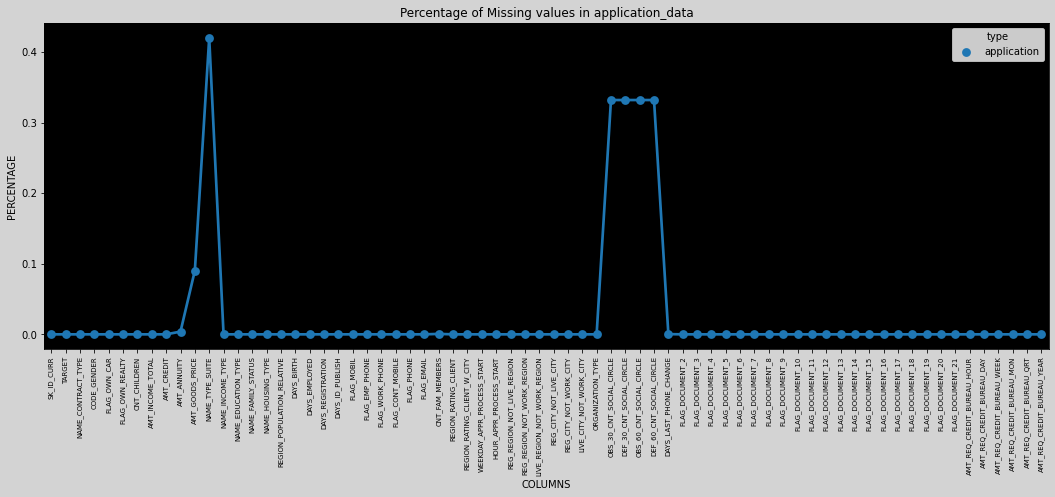

In [20]:
# again plotting to see missing ratio of remaining column after rectifying other columns.

fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((application.isnull().sum())*100/application.shape[0]).reset_index()
miss_application_data["type"] = "application"
ax = sns.pointplot("index",0,data=miss_application_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [21]:
print('AMT_ANNUITY NAN COUNT :' ,application['AMT_ANNUITY'].isnull().sum())
print('AMT_GOODS_PRICE NAN COUNT :' ,application['AMT_GOODS_PRICE'].isnull().sum())
print('NAME_TYPE_SUITE NAN COUNT :', application['NAME_TYPE_SUITE'].isnull().sum())  
print('OBS_30_CNT_SOCIAL_CIRCLE NaN COUNT : ', application['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum())
print('DEF_30_CNT_SOCIAL_CIRCLE NAN COUNT: ', application['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())
print('OBS_60_CNT_SOCIAL_CIRCLE NAN COUNT :', application['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum())
print('OBS_60_CNT_SOCIAL_CIRCLE NAN COUNT :', application['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

AMT_ANNUITY NAN COUNT : 12
AMT_GOODS_PRICE NAN COUNT : 278
NAME_TYPE_SUITE NAN COUNT : 1292
OBS_30_CNT_SOCIAL_CIRCLE NaN COUNT :  1021
DEF_30_CNT_SOCIAL_CIRCLE NAN COUNT:  1021
OBS_60_CNT_SOCIAL_CIRCLE NAN COUNT : 1021
OBS_60_CNT_SOCIAL_CIRCLE NAN COUNT : 1021


**Since this missing value(i.e null values) are so less we will drop them.**

In [22]:
application= application.dropna()                   # dropping remaining null values.

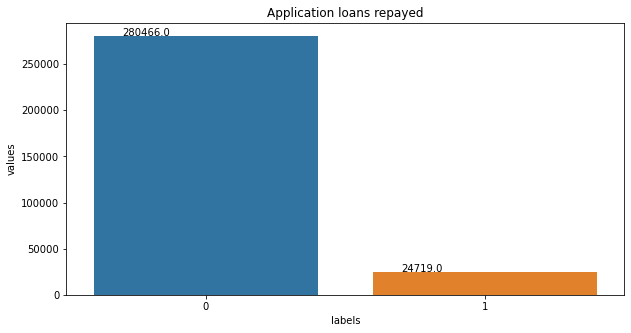

In [23]:
# Plottting 'Target' column, as it is our target column.

temp = application["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (10,5))
plt.title('Application loans repayed')
sns.set_color_codes("pastel")
ax=sns.barplot(x = 'labels', y="values", data=df)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50), )
locs, labels = plt.xticks()
plt.show()

In [24]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,305185.000000,305185.000000,305185.000000,3.051850e+05,3.051850e+05,305185.000000,3.051850e+05,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.0,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000
mean,278164.198650,0.080997,0.417150,1.686140e+05,5.992816e+05,27136.759613,5.382271e+05,0.020844,-16041.650124,63875.190770,-4987.879218,-2994.648620,1.0,0.819722,0.199699,0.998142,0.281305,0.056851,2.153127,2.053266,2.032266,12.059413,0.015161,0.050704,0.040543,0.078208,0.230654,0.179724,1.421620,0.143395,1.404692,0.100025,-965.038731,0.000043,0.712869,0.000082,0.014716,0.088153,0.000138,0.081593,0.003847,0.000020,0.003853,0.000007,0.003418,0.002815,0.001130,0.009434,0.000262,0.007841,0.000573,0.000495,0.000328,0.005515,0.006055,0.029828,0.231479,0.229942,1.782683
std,102784.522248,0.272831,0.722267,2.376652e+05,4.020170e+05,14476.069729,3.689286e+05,0.013808,4362.501707,141327.264383,3522.342703,1509.345504,0.0,0.384419,0.399774,0.043063,0.449637,0.231558,0.910632,0.508841,0.502573,3.265809,0.122194,0.219392,0.197228,0.268500,0.421252,0.383958,2.400943,0.446700,2.379826,0.362290,826.886059,0.006527,0.452424,0.009050,0.120412,0.283518,0.011730,0.273744,0.061904,0.004434,0.061956,0.002560,0.058360,0.052979,0.033603,0.096668,0.016189,0.088203,0.023939,0.022238,0.018099,0.077894,0.102922,0.190915,0.856023,0.745198,1.765720
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189129.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16573.500000,2.385000e+05,0.010006,-19685.000000,-2761.000000,-7480.000000,-4299.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1572.000000,0.000000,0.000

In [26]:
application.describe(include='object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
count,305185,305185,305185,305185,305185,305185,305185,305185,305185,305185,305185
unique,2,3,2,2,7,8,5,5,6,7,58
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,TUESDAY,Business Entity Type 3
freq,277211,200980,201379,212101,247625,157654,217062,195045,270800,53511,67417


In [27]:
application.select_dtypes('object').nunique()       # Checking unique category in each column

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [28]:
for col in application.select_dtypes(include='object').columns:      # for getting categorical features and its unique values.
    print(col)
    print(application[col].unique())

NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']
CODE_GENDER
['M' 'F' 'XNA']
FLAG_OWN_CAR
['N' 'Y']
FLAG_OWN_REALTY
['Y' 'N']
NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
NAME_HOUSING_TYPE
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
WEEKDAY_APPR_PROCESS_START
['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
ORGANIZATION_TYPE
['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport

# Exploratory Data Analysis and Visualization

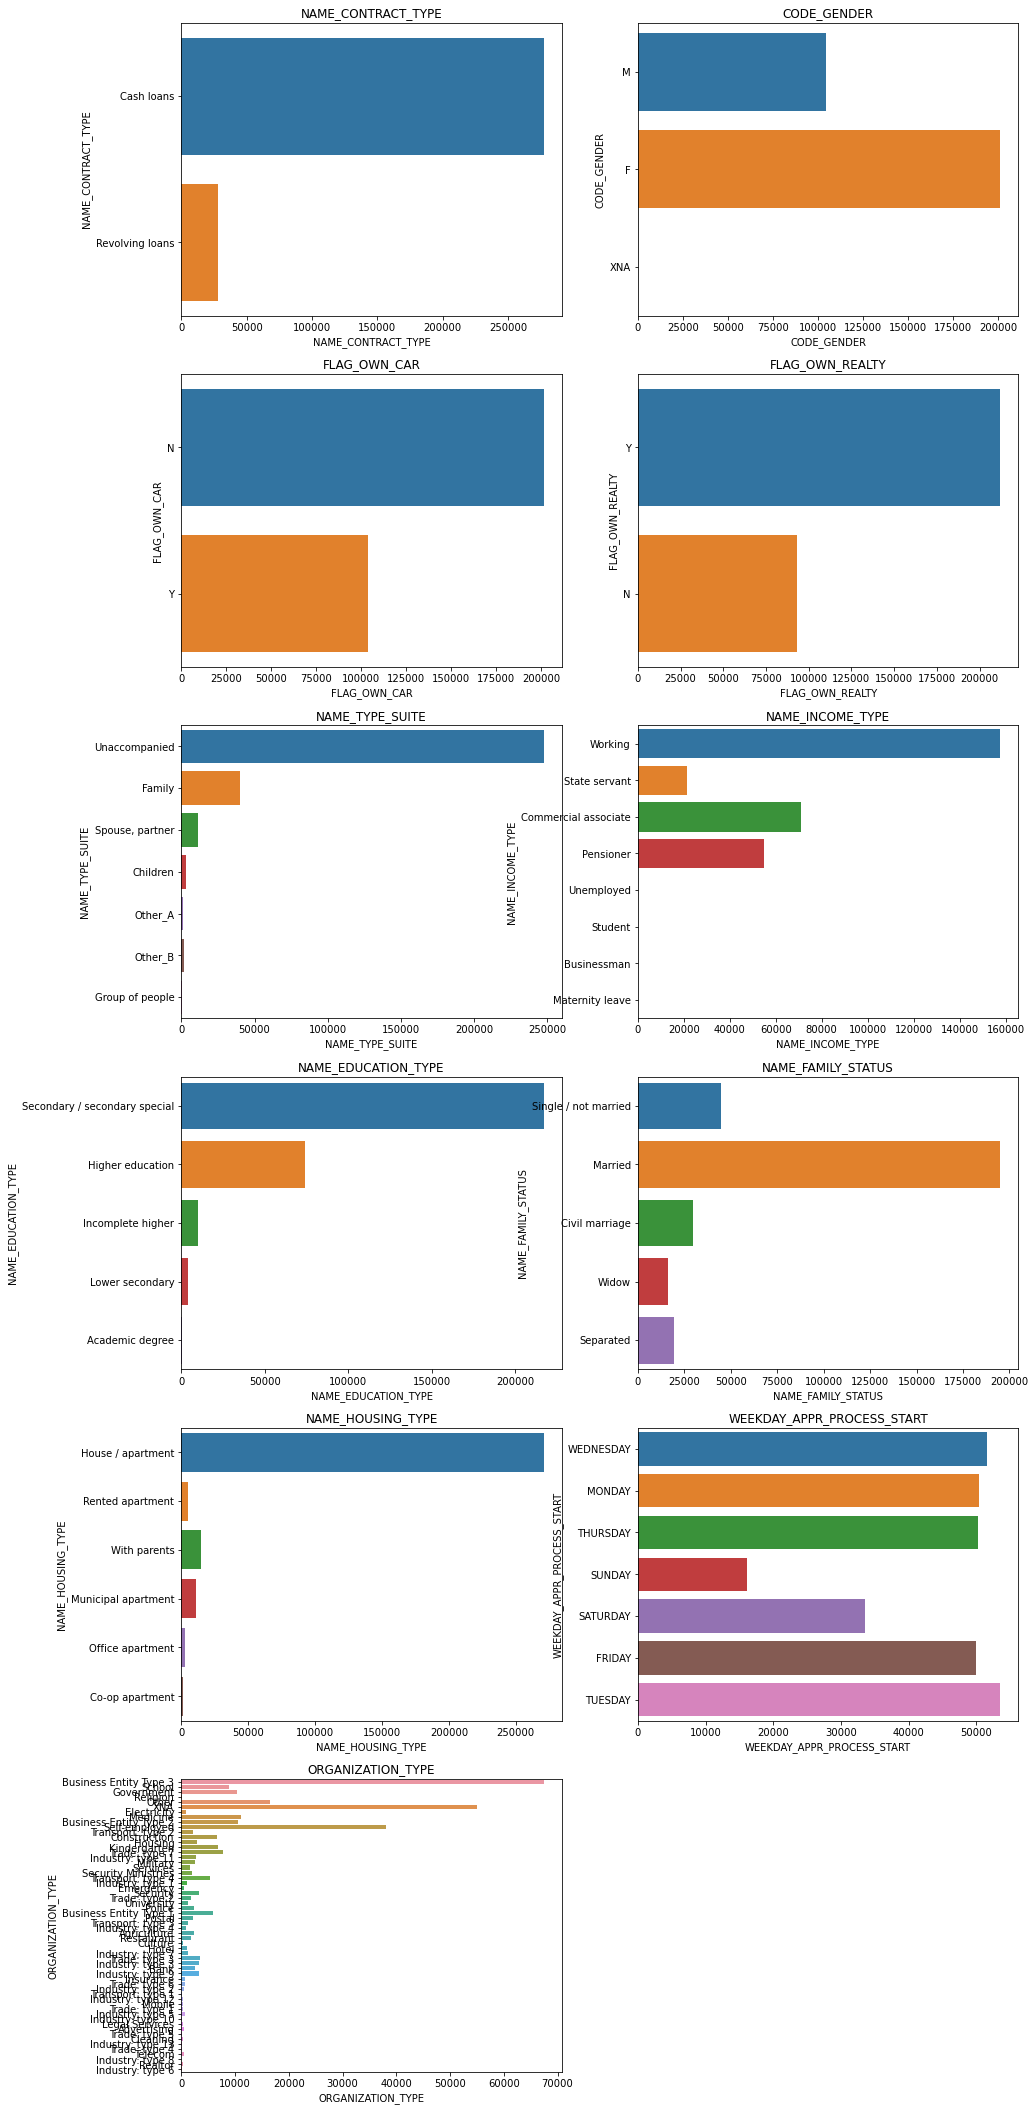

In [29]:
#  plotting bar chart for categorical variable and their unique features.

cat_v= application.select_dtypes(include=['object']).columns
plt.figure(figsize=(15,70))
plotnumber=1
for column in cat_v:
    if plotnumber<=25:
        
        plt.subplot(11,2,plotnumber)
        sns.countplot(y=column,data=application)
        plt.xlabel(column)
        plt.title(column)
        plotnumber+=1
plt.show()

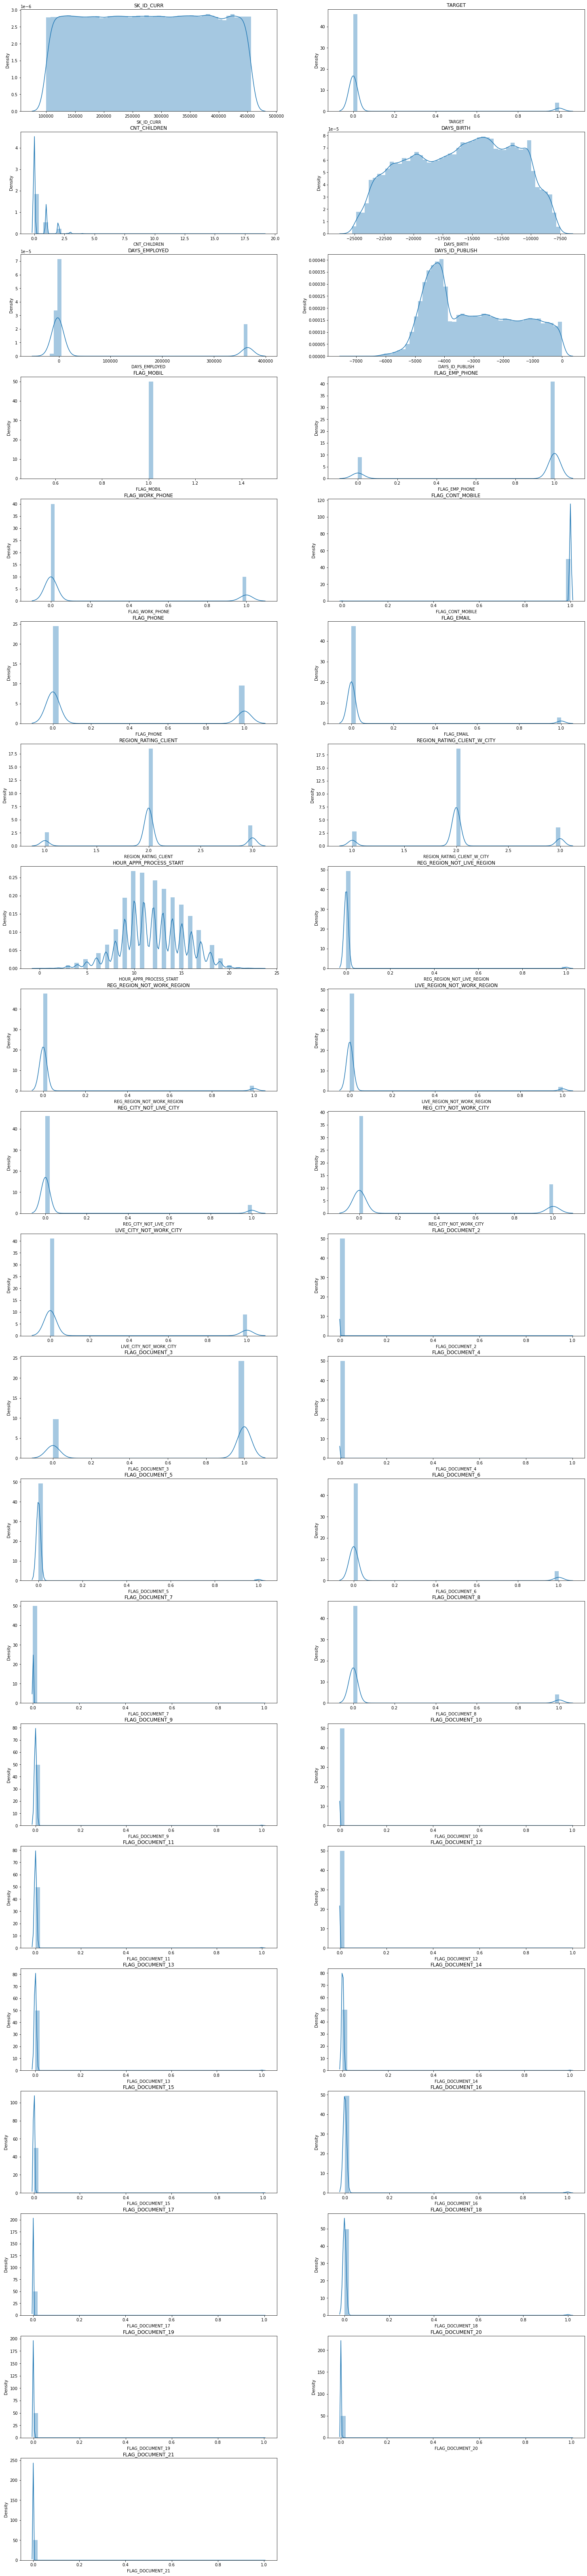

In [30]:
# let's see how data is distributed for every column

cat_v1= application.select_dtypes('int').columns        
plt.figure(figsize=(25,300))                        # defining  canvas size
plotnumber=1
for column in cat_v1:                       # iteration of columns / acessing the columns from  dataset
    if plotnumber<=110:
        
        plt.subplot(54,2,plotnumber)
        sns.distplot(application[column])
        plt.xlabel(column)
        plt.title(column)
        plotnumber+=1
plt.show()

<span style='color:red'>The numbers in the DAYS_BIRTH & DAYS_ID_PUBLISH column are negative because they are recorded relative to the current loan application date. Hence, to see these stats in years, we can mutliple by -1 and divide by the number of days in a year (365)</span>

In [31]:
(application['DAYS_BIRTH'] / -365).describe()


count    305185.000000
mean         43.949726
std          11.952059
min          20.517808
25%          34.027397
50%          43.167123
75%          53.931507
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [32]:
(application['DAYS_ID_PUBLISH'] / -365).describe()

count    305185.000000
mean          8.204517
std           4.135193
min          -0.000000
25%           4.712329
50%           8.917808
75%          11.778082
max          19.717808
Name: DAYS_ID_PUBLISH, dtype: float64

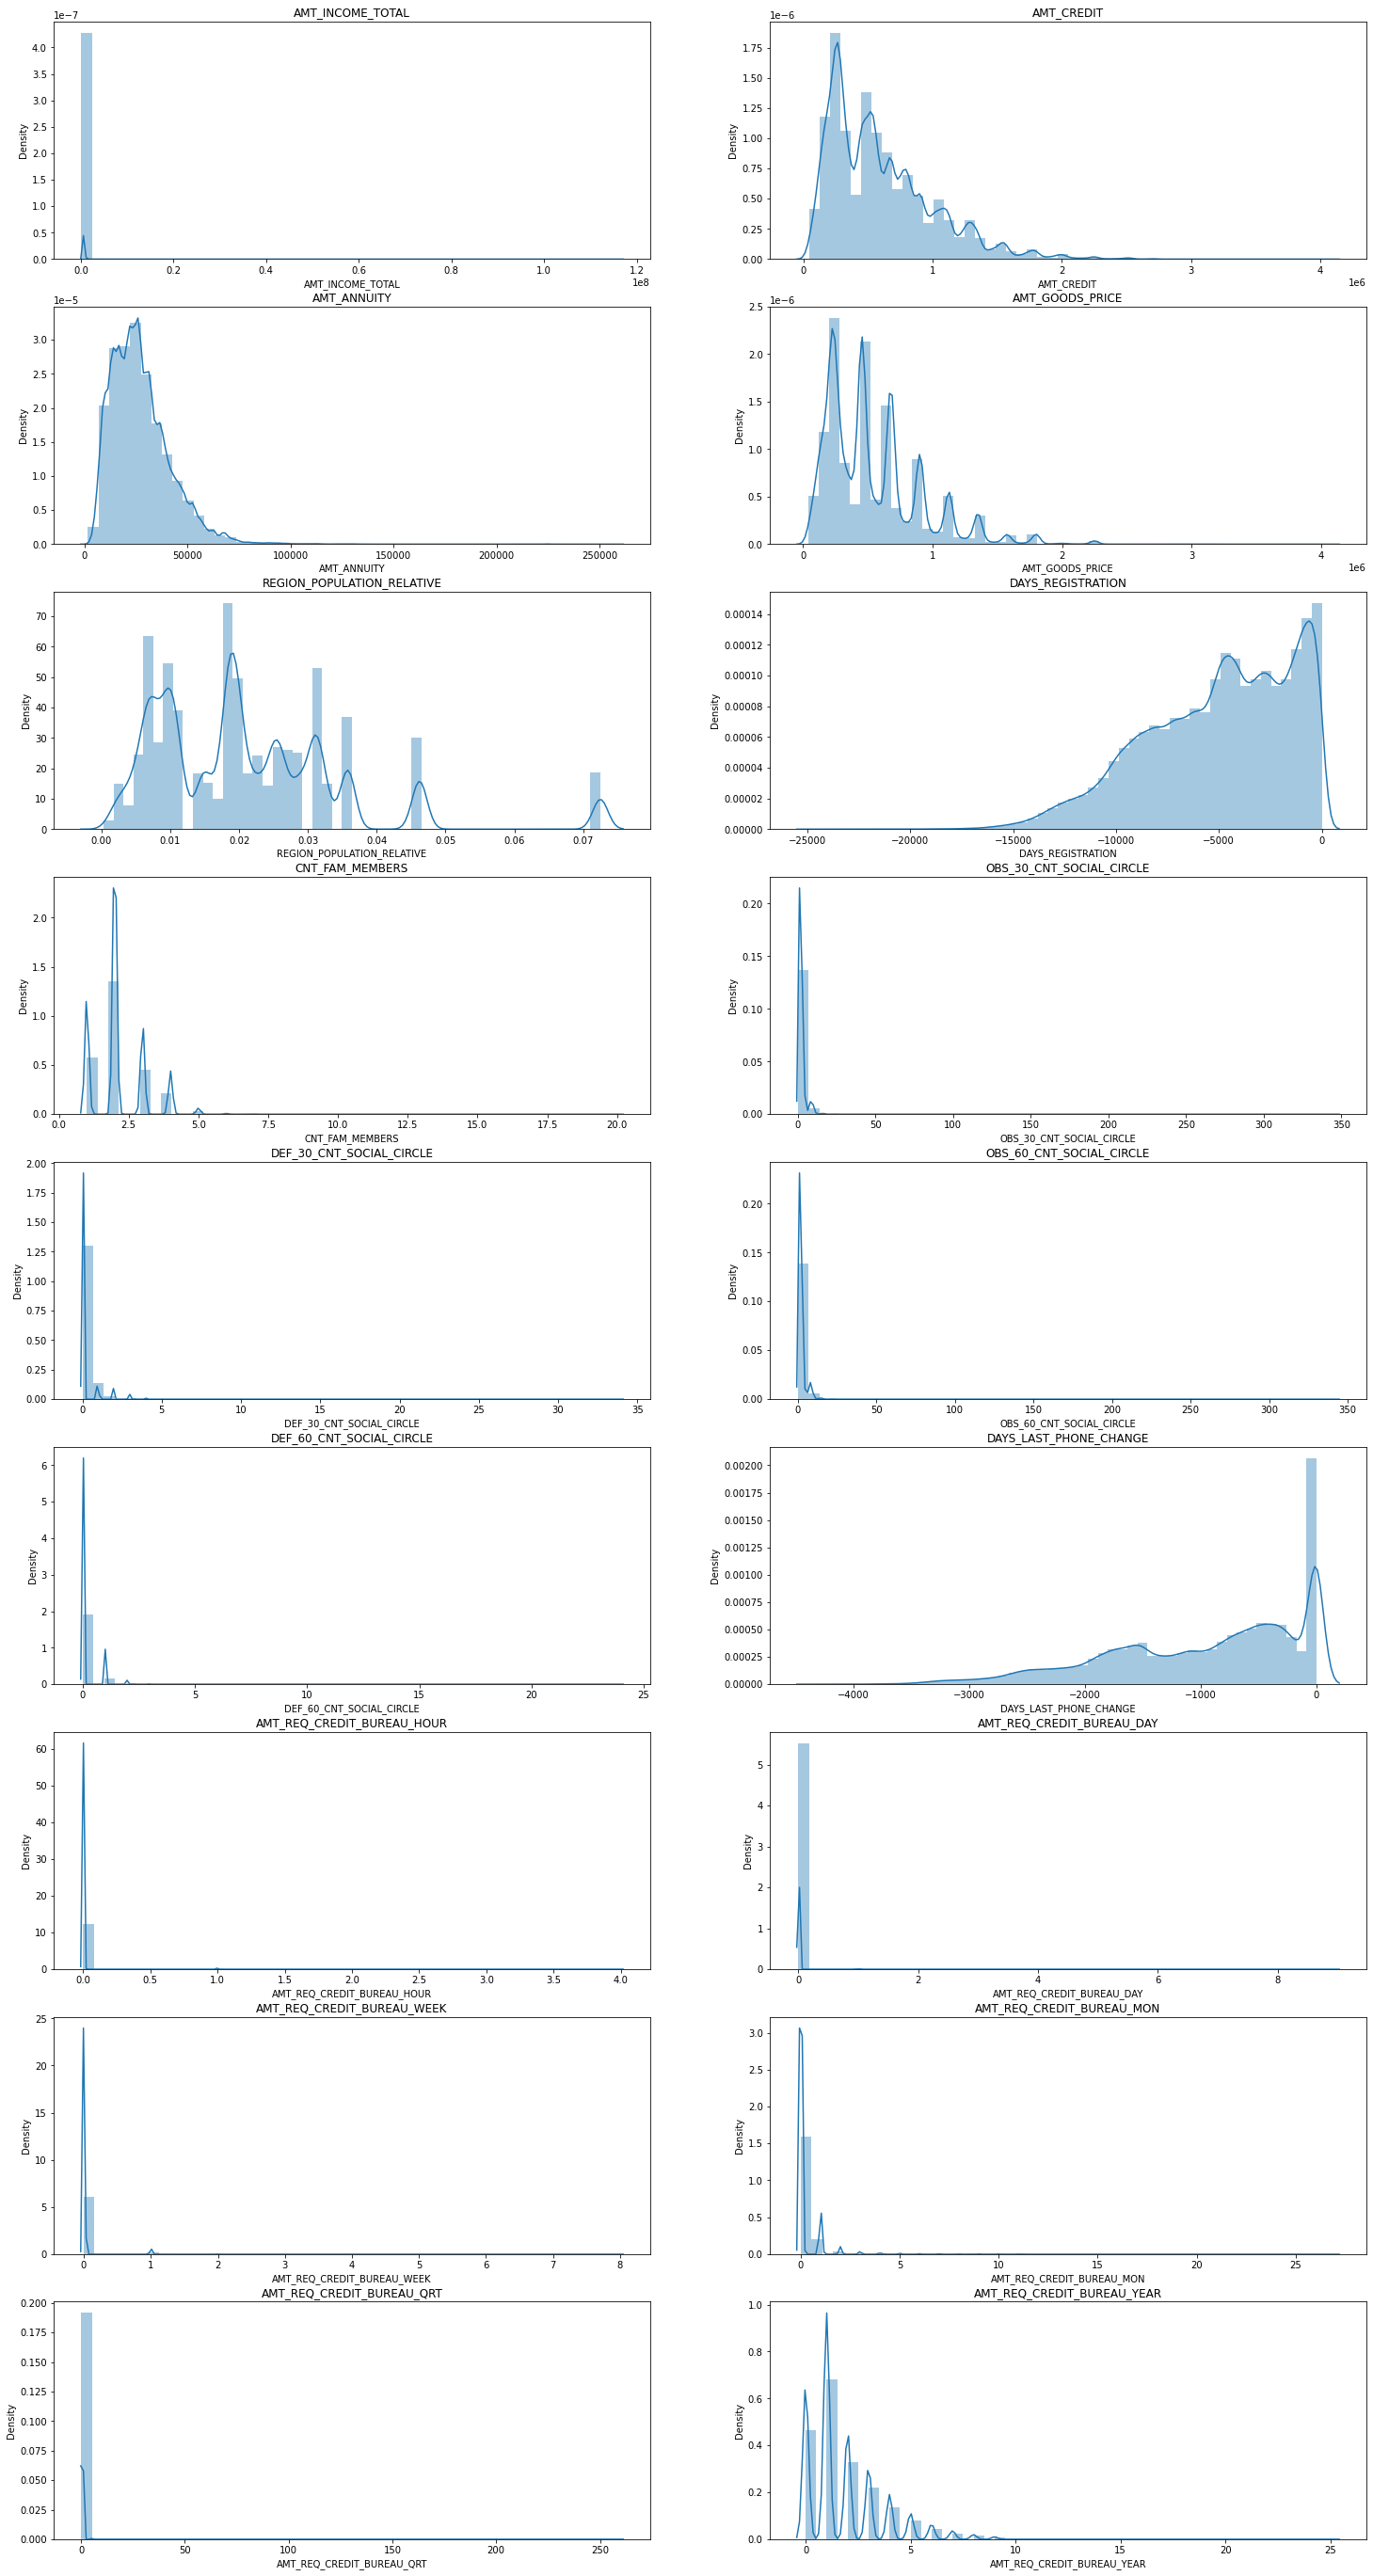

In [33]:
# let's see how data is distributed for every column
cat_v1= application.select_dtypes(include=['float']).columns
plt.figure(figsize=(25,300))                                   # defining  canvas size
plotnumber=1
for column in cat_v1:                                        # iteration of columns / acessing the columns from  dataset
    if plotnumber<=110:
        
        plt.subplot(54,2,plotnumber)
        sns.distplot(application[column])
        plt.xlabel(column)
        plt.title(column)
        plotnumber+=1
plt.show()

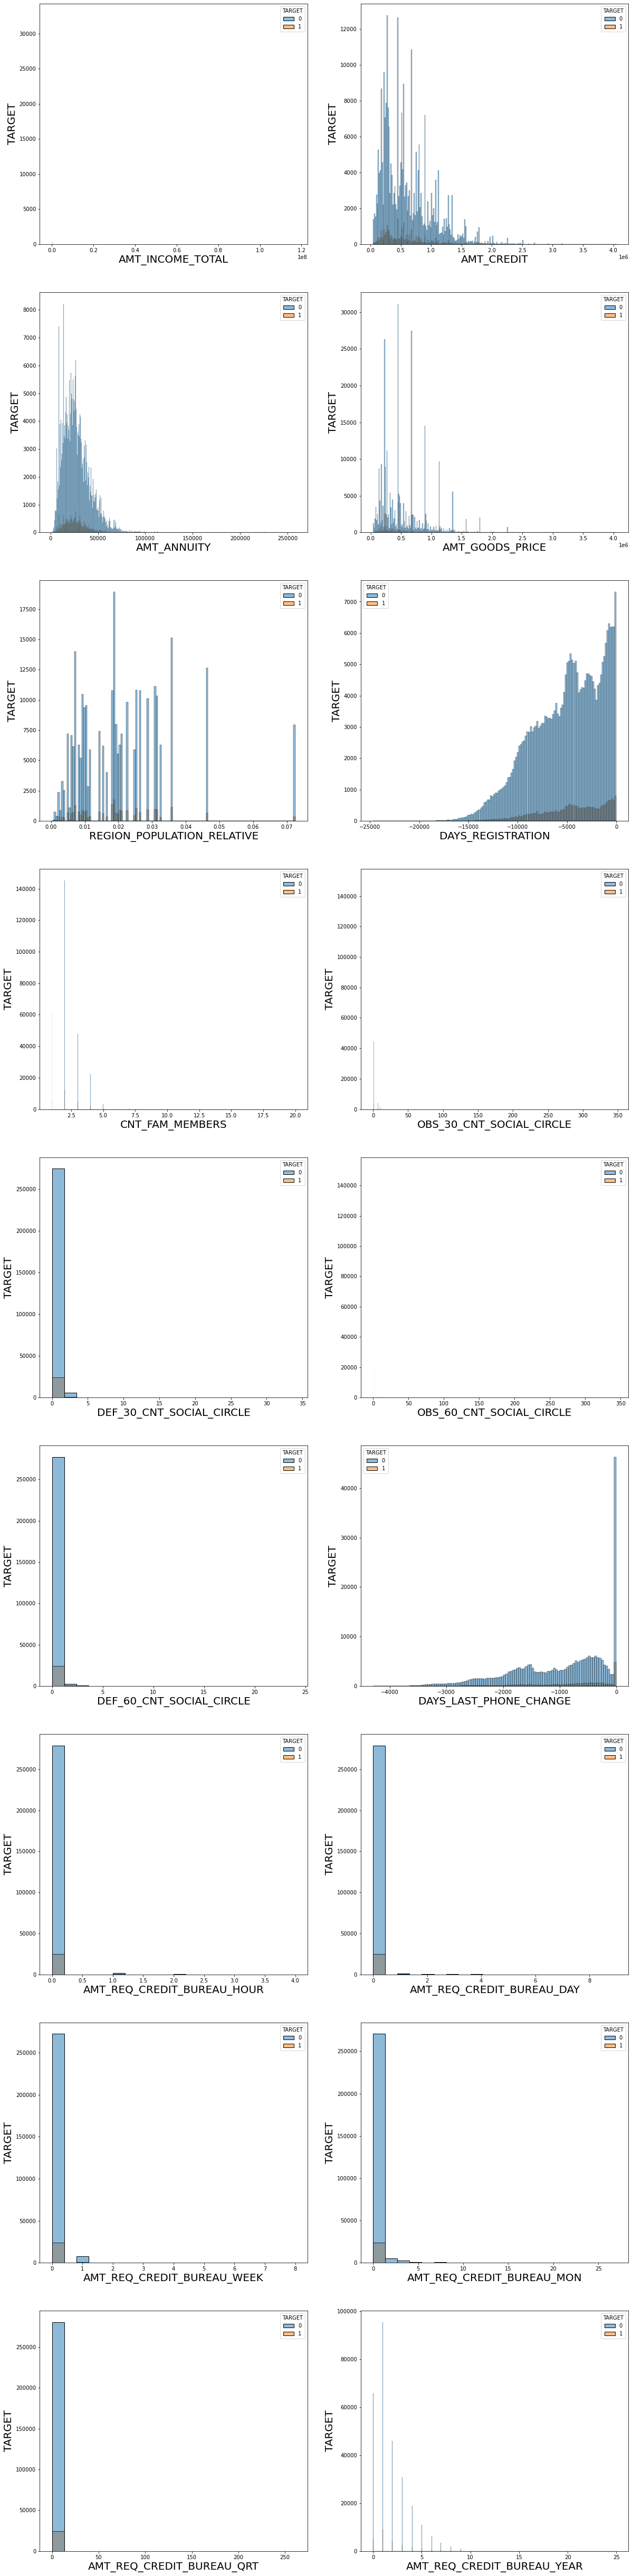

In [34]:
#  plotting histogram for numerical variable and their unique features with relation to TARGET.

plt.figure(figsize=(20,300), facecolor='white')     # defining  canvas size
plotnumber = 1  # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 

for column in cat_v1:               # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=30 :                   
        plt.subplot(30,2,plotnumber)    
        sns.histplot(x=application[column],hue=application.TARGET)  ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20)               #assigning name to x-axis and "name" font size is 20
        plt.ylabel('TARGET',fontsize=20)             #assigning name to y-axis and "name" font size is 20
    plotnumber+=1                                    # increment of plotnumber 
plt.show() 

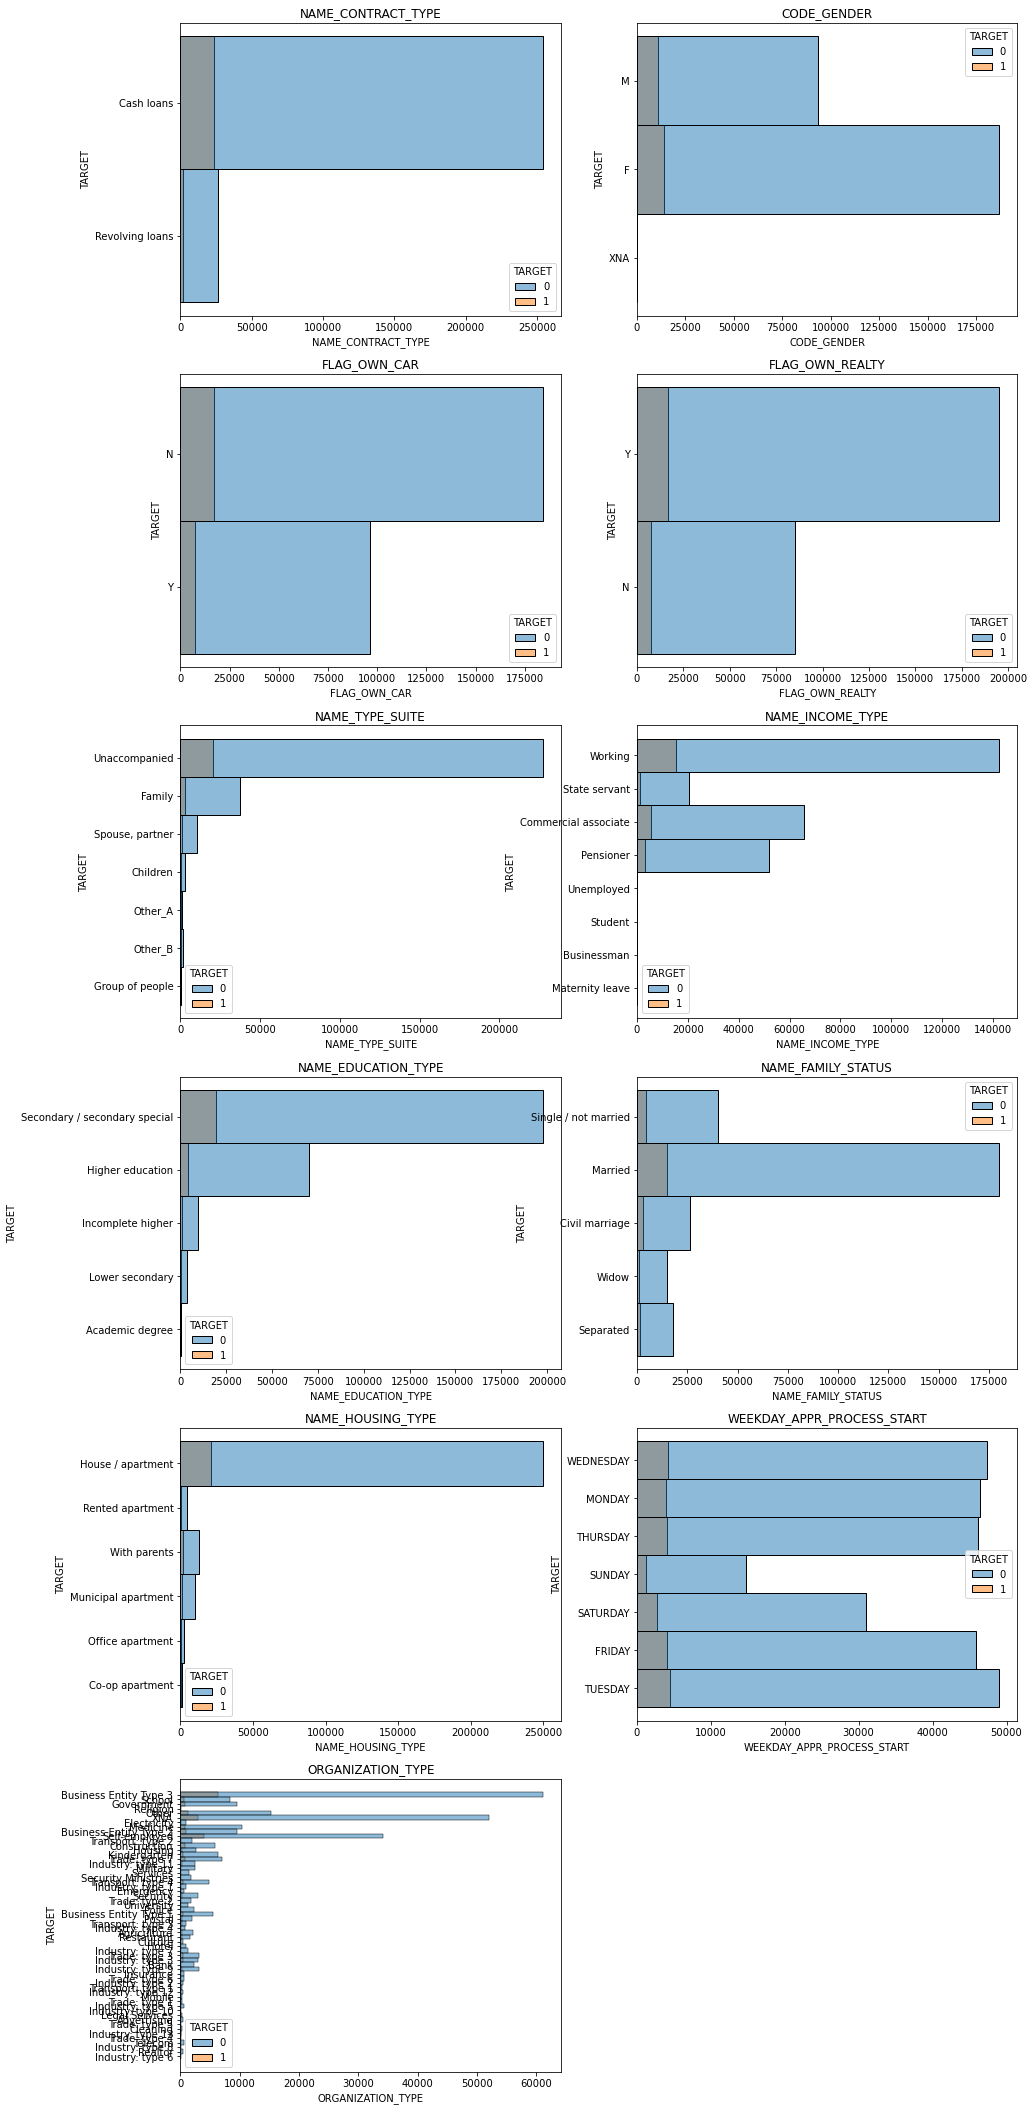

In [35]:
#  plotting histogram for categorical variable and their unique features with relation to TARGET.

cat_v= application.select_dtypes(include=['object']).columns
plt.figure(figsize=(15,70))
plotnumber=1
for column in cat_v:
    if plotnumber<=25:
        
        plt.subplot(11,2,plotnumber)
        sns.histplot(y=column,data=application,hue=application.TARGET)
        plt.xlabel(column)
        plt.ylabel('TARGET')
        plt.title(column)
        plotnumber+=1
plt.show()

# Insights

* The TARGET is the binary variable that we are trying to predict with 2 values:
   
   0: Loan was repaid on time
  
  1: Client had payment difficulties or late payment > X-days/Y-installments on loan.
 
 Our TARGET is an imbalanced data.
 
* As the client gets older, there is a negative linear relationship with the Default Risk target, meaning that as clients get older, the default risk gets lower (TARGET-->0) since they tend to repay their loans on time more often.

* According to the foregoing graph, there is an evident trend denoting younger applicants are more risky as they are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and below 5% for the oldest age group

            
             
* The demand for cash loan is way more tha revolving loan (i.e ~87% of loan are cash loan).
* Female applicant are almost double than that of male applicant.
* ~66% of applicant don'thave car.
* ~70% of loan applicant have own house or flat.
* Unaccompained client formin majority with ~80% of loan applicant.
* Working class client are highest loan taker, follwed by commercil associate.
* Applicant with secondary education are highest which is ~68% of total applicant,followed by applicant with higher education.

* Married people are highest loan takers.
* Majority of applicant have business entity.

# Checking Correlation 

<AxesSubplot:>

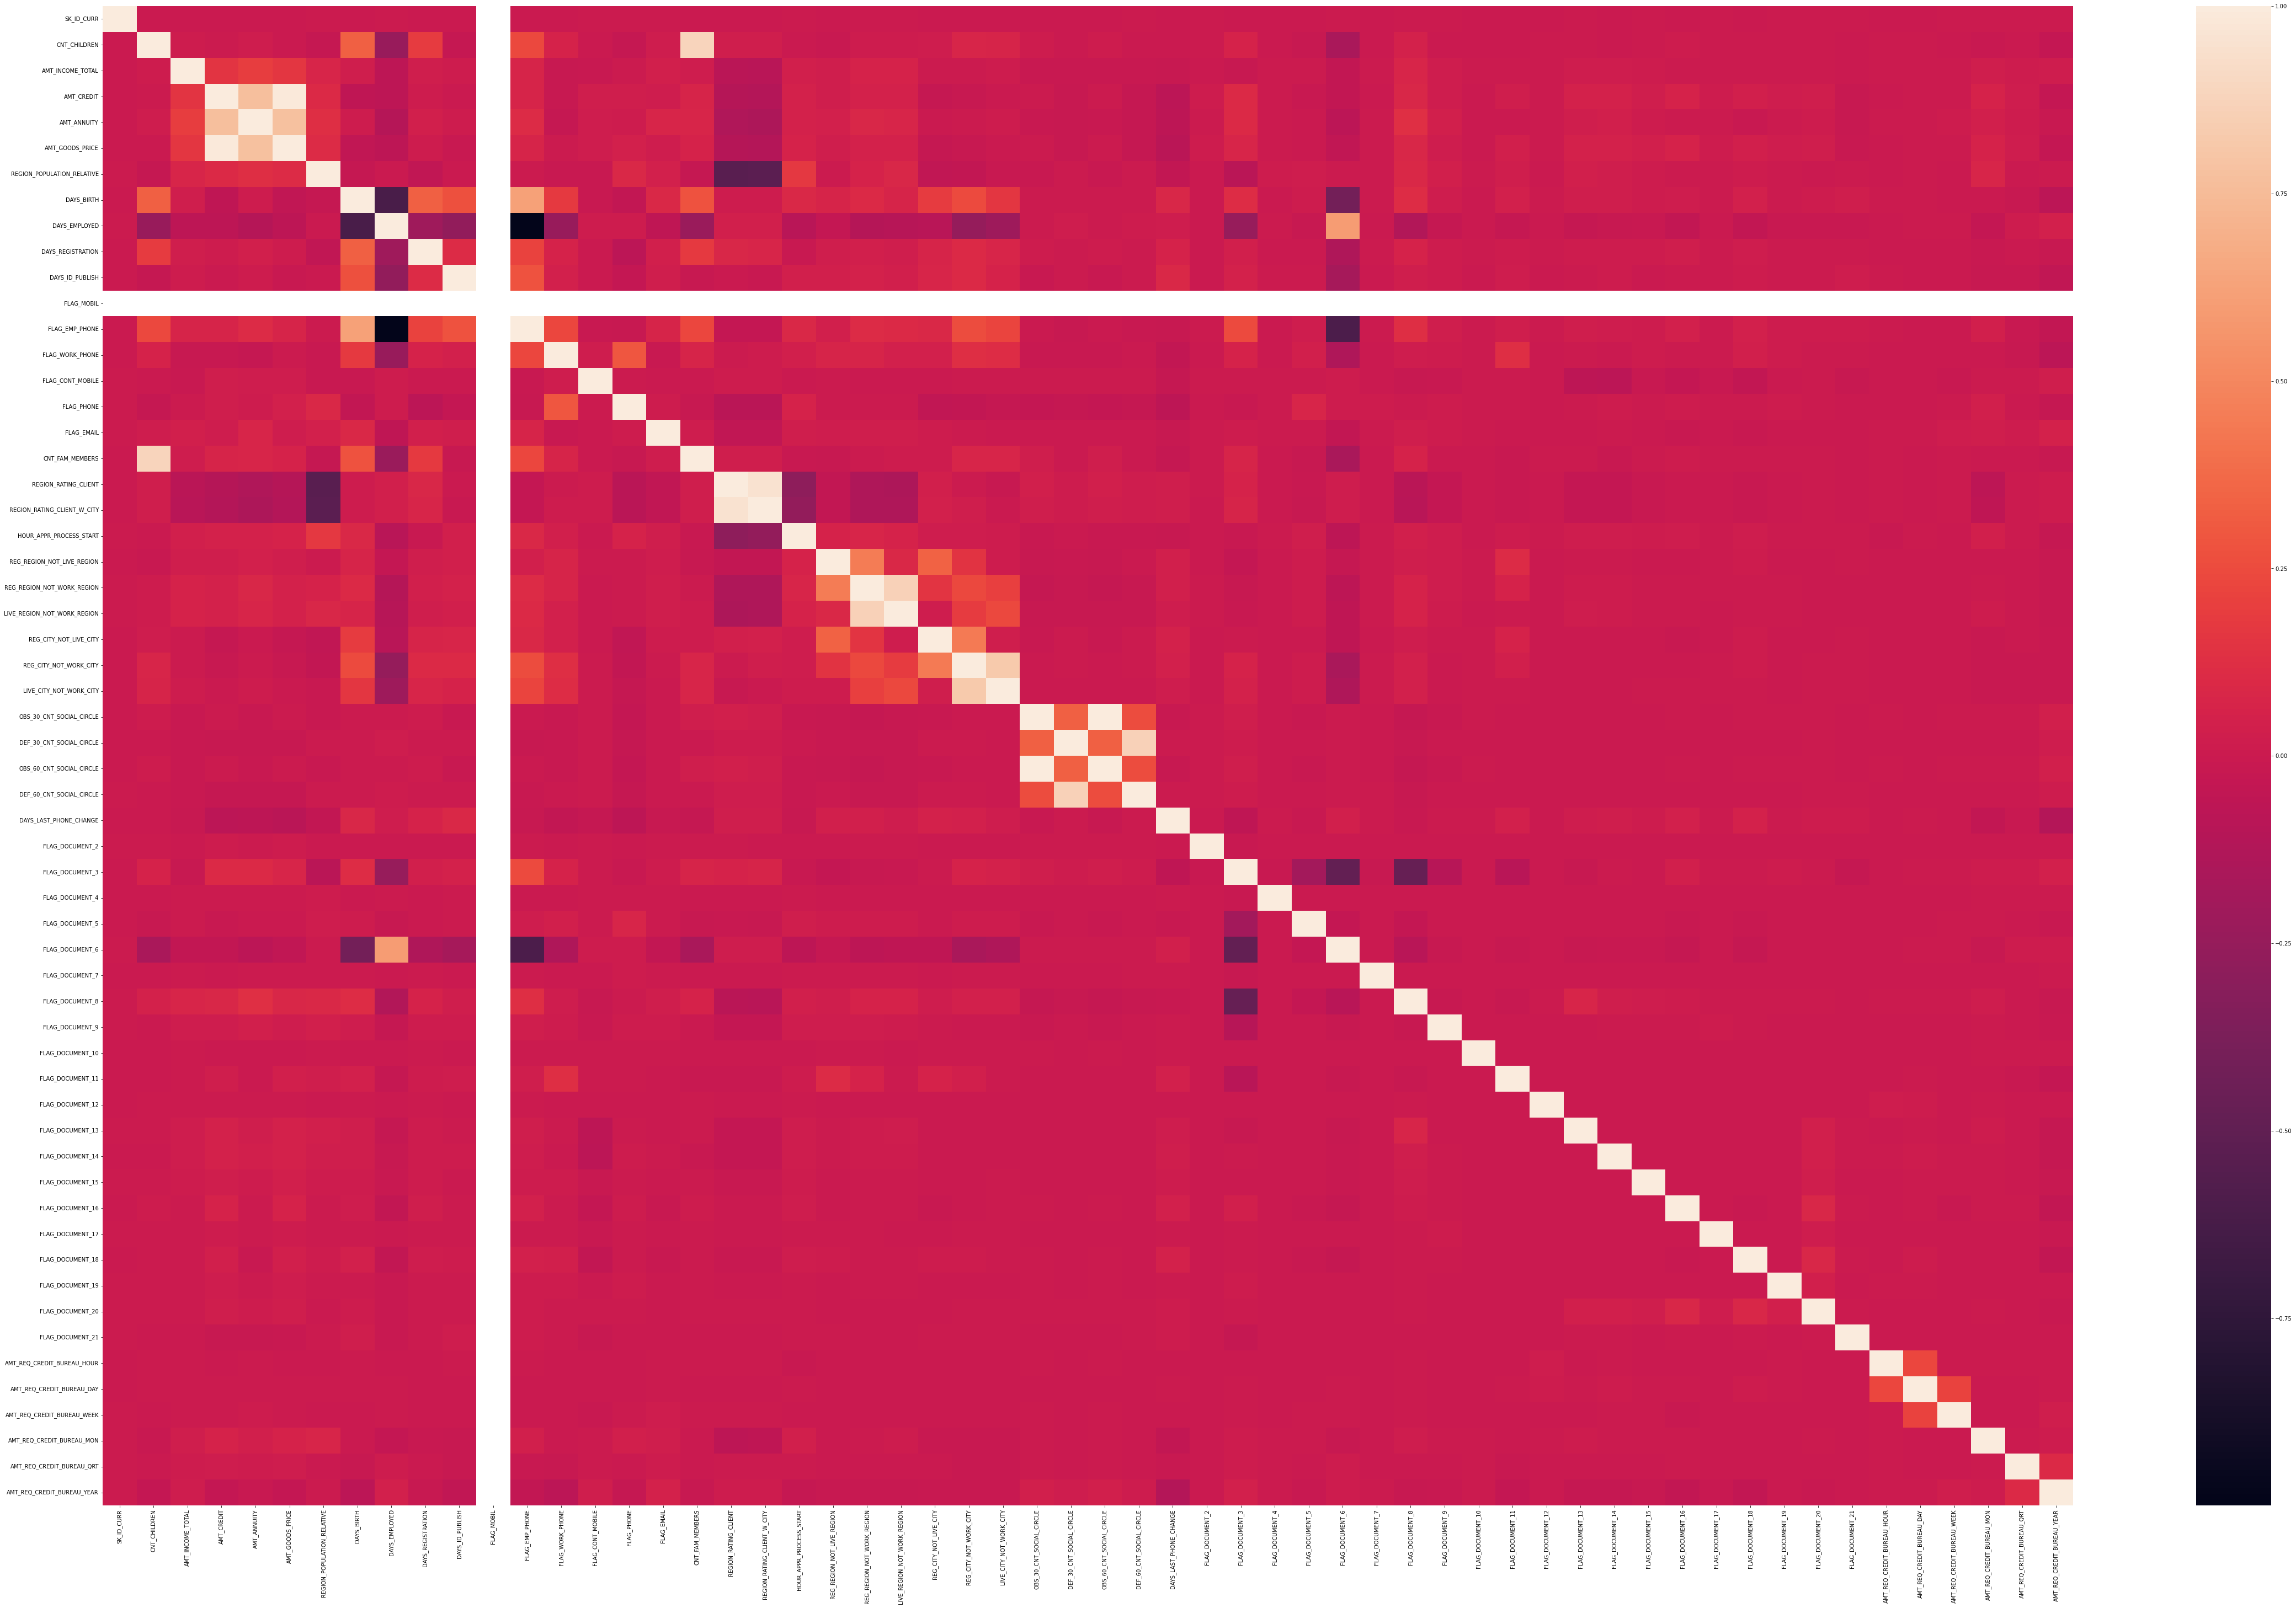

In [36]:
plt.figure(figsize=(80,50))
sns.heatmap(application.drop('TARGET',axis=1).corr())

In [37]:
corrmat = application.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(20)

,Var1,Var2,Correlation
1798,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
776,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
358,AMT_GOODS_PRICE,AMT_CREDIT,0.99
1199,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
1064,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
1858,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
1439,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86
1619,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.83
299,AMT_ANNUITY,AMT_CREDIT,0.77
359,AMT_GOODS_PRICE,AMT_ANNUITY,0.77


# Feature Selection

In [38]:
application=application.drop(['FLAG_EMP_PHONE','AMT_GOODS_PRICE','REGION_RATING_CLIENT_W_CITY','OBS_60_CNT_SOCIAL_CIRCLE',
                              'CNT_CHILDREN','LIVE_REGION_NOT_WORK_REGION','FLAG_MOBIL','FLAG_DOCUMENT_6',
                             'FLAG_DOCUMENT_3', 'REGION_RATING_CLIENT'], axis=1)

# Handling Categorical Features

In [39]:
from sklearn.preprocessing import LabelEncoder          # initializing label encoder.
le= LabelEncoder()

for i in cat_v:                                  # iterating through every categorical feature and label encoding them.
    application[i]= le.fit_transform(application[i])
    
    
application.head() 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,202500.0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,0,1,1,0,1.0,6,10,0,0,0,0,0,5,2.0,2.0,2.0,-1134.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,0,1,1,0,2.0,1,11,0,0,0,0,0,39,1.0,0.0,0.0,-828.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,67500.0,135000.0,6750.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,0,1.0,1,9,0,0,0,0,0,11,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,135000.0,312682.5,29686.5,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,0,1,0,0,2.0,6,17,0,0,0,0,0,5,2.0,0.0,0.0,-617.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,121500.0,513000.0,21865.5,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,0,1,0,0,1.0,4,11,0,0,0,1,1,37,0.0,0.0,0.0,-1106.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# INDEPENDENT & DEPENDENT VARIBLE

In [40]:
X= application.drop(columns=['TARGET'])         # Independendant Variable

y= application['TARGET']                        # Dependant Variable

# Importing some Essential Libraries

In [41]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# Scaling 

In [42]:
## scaling the data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [43]:
X_scaled

array([[-1.73335913, -0.31766697,  1.38865439, ..., -0.27041285,
        -0.30856615, -0.44326605],
       [-1.73334941, -0.31766697, -0.72003764, ..., -0.27041285,
        -0.30856615, -1.00960806],
       [-1.73333968,  3.14795086,  1.38865439, ..., -0.27041285,
        -0.30856615, -1.00960806],
       ...,
       [ 1.73264504, -0.31766697, -0.72003764, ...,  0.89778183,
        -0.30856615, -0.44326605],
       [ 1.73265477, -0.31766697, -0.72003764, ..., -0.27041285,
        -0.30856615, -1.00960806],
       [ 1.7326645 , -0.31766697, -0.72003764, ...,  2.0659765 ,
        -0.30856615, -0.44326605]])

In [44]:
## splitting the training and testing data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42)

# Handling Imbalanced Data

In [45]:
from collections import Counter              # importing counter to check count of each label.
from imblearn.over_sampling import SMOTE

sm= SMOTE()                                  
#print(Counter(y))                # checking count for each class.

#X_sm,y_sm= sm.fit_resample(X_scaled,y)               # Applying sampling on target variable
#print(Counter(y_sm))

In [46]:
X_train_sm, y_train_sm = sm.fit_resample(X_train.astype('float'),
                                                  y_train)

# Model Creation

# KNN Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
# taking optimal value of 'k' to determine how many nearest neighbors to create

error_rate=[]                  # create a list to store error value of 'k'.

for i in range(1,11):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))
    print(np.mean(pred_i !=y_test))

0.1470568960771721
0.08748705715821067
0.09911267808694968
0.08417106832509798
0.0876705506114264
0.08270312069937219
0.08393514817096347
0.0819560402112796
0.08258516062230493
0.08166769335622633


Text(0, 0.5, 'Error Rate')

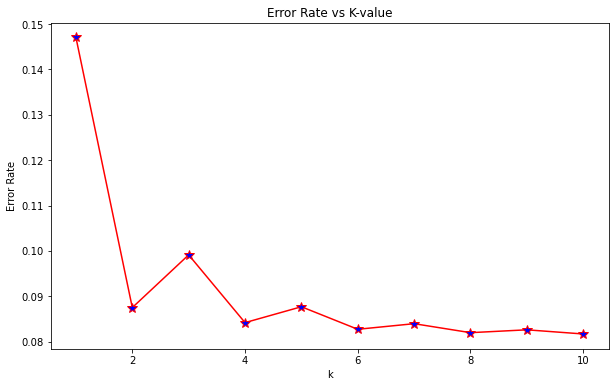

In [49]:
# Lets plot the K-value and error rate.

plt.figure(figsize=(10,6))
plt.plot(range(1,11), error_rate, color='red', linestyle='-', marker='*', markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K-value')
plt.xlabel('k')
plt.ylabel('Error Rate')

In [50]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(n_neighbors=3)

In [51]:
# Predict the output for X_test
y_pred = knn.predict(X_test)

In [52]:
confusion_matrix(y_test, y_pred)

array([[49394, 20695],
       [ 3883,  2325]], dtype=int64)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80     70089
           1       0.10      0.37      0.16      6208

    accuracy                           0.68     76297
   macro avg       0.51      0.54      0.48     76297
weighted avg       0.86      0.68      0.75     76297



# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()                          # object ceation pf logistic regression

log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [55]:
y_train_pre= log_reg.predict(X_train_sm)           # predicting 'y_train'

In [56]:
y_pre= log_reg.predict(X_test)                # predicting 'y_test'

In [57]:
report= classification_report(y_test,y_pre)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.63      0.75     70089
           1       0.13      0.61      0.21      6208

    accuracy                           0.62     76297
   macro avg       0.54      0.62      0.48     76297
weighted avg       0.88      0.62      0.71     76297



In [58]:
confusion_matrix(y_test, y_pre)

array([[43878, 26211],
       [ 2413,  3795]], dtype=int64)

# Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

DTC= DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1,
                            min_samples_split= 3, splitter= 'random')                 #object creation for decision tree  
DTC.fit(X_train, y_train)

y_hat= DTC.predict(X_test)
y_hat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
#Training score

y_train_predict=DTC.predict(X_train)                                   #passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)                     #checking accuracy
acc_train

0.9196768725315438

In [62]:
pd.crosstab(y_train,y_train_predict)

col_0,0,1
TARGET,,
0,210361,16
1,18369,142


In [63]:
# Train score

print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    210377
           1       0.90      0.01      0.02     18511

    accuracy                           0.92    228888
   macro avg       0.91      0.50      0.49    228888
weighted avg       0.92      0.92      0.88    228888



In [64]:
pd.crosstab(y_test,y_hat)

col_0,0,1
TARGET,,
0,70041,48
1,6198,10


In [65]:
# Test score

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70089
           1       0.17      0.00      0.00      6208

    accuracy                           0.92     76297
   macro avg       0.55      0.50      0.48     76297
weighted avg       0.86      0.92      0.88     76297



# Hyperparameters of DecisionTree- 'Grid Search Cross Validation'.

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values.

params = {
    "criterion":("gini", "entropy"),                           # quality of split.
    "splitter":("best", "random"),                             # searches the features for a split.
    "max_depth":(list(range(1, 20))),                          # depth of tree range from 1 to 19.
    "min_samples_split":[2, 3, 4],                             # the minimum number of samples required to split internal node.
    "min_samples_leaf":list(range(1, 20)),      
}                    # minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19.

tree_clf = DecisionTreeClassifier(random_state=3)                      #object creation for decision tree with random state 3.

tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
# passing model to gridsearchCV ,
# tree_clf-->model
# params---->hyperparametes(dictionary we created).
# scoring--->performance matrix to check performance.
# n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
# verbose=Controls the verbosity: the higher, the more messages.
# >1 : the computation time for each fold and parameter candidate is displayed;
# >2 : the score is also displayed;
# >3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
# cv------> number of folds.

tree_cv.fit(X_train,y_train)                         # training data on gridsearch cv
best_params = tree_cv.best_params_                   # it will give you best parameters 
print(f"Best paramters: {best_params})")             # printing  best parameters



Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'})


In [68]:
tree_cv.best_params_                     # getting best parameters from cv.

{'criterion': 'gini',
 'max_depth': 19,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [69]:
tree_cv.best_score_                                  # getting best score from cv.

0.08170660190796865

In [70]:
# passing best parameter to decision tree.

DTC1= DecisionTreeClassifier(criterion='gini',max_depth=19,min_samples_leaf= 1,min_samples_split=2,splitter='best') 

In [71]:
DTC1.fit(X_train, y_train)                           # training model with best parameters.

DecisionTreeClassifier(max_depth=19)

In [72]:
y_hat1= DTC1.predict(X_test)                         # predicting.

In [73]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     70089
           1       0.12      0.05      0.07      6208

    accuracy                           0.89     76297
   macro avg       0.52      0.51      0.51     76297
weighted avg       0.86      0.89      0.87     76297



[Text(0.4876991659257961, 0.975, 'X[14] <= 0.467\ngini = 0.149\nsamples = 228888\nvalue = [210377, 18511]'),
 Text(0.27261238047057024, 0.925, 'X[2] <= 0.334\ngini = 0.125\nsamples = 145060\nvalue = [135358, 9702]'),
 Text(0.12497425973377103, 0.875, 'X[14] <= -0.652\ngini = 0.108\nsamples = 101217\nvalue = [95412, 5805]'),
 Text(0.06487052310168963, 0.825, 'X[17] <= 0.516\ngini = 0.09\nsamples = 51664\nvalue = [49212, 2452]'),
 Text(0.02757579310297382, 0.775, 'X[15] <= -0.476\ngini = 0.086\nsamples = 47938\nvalue = [45781, 2157]'),
 Text(0.007551505256012768, 0.725, 'X[32] <= 9.753\ngini = 0.062\nsamples = 7635\nvalue = [7391, 244]'),
 Text(0.007404740501568548, 0.675, 'X[55] <= 23.415\ngini = 0.061\nsamples = 7633\nvalue = [7391, 242]'),
 Text(0.007257975747124328, 0.625, 'X[16] <= -4.855\ngini = 0.061\nsamples = 7632\nvalue = [7391, 241]'),
 Text(0.007111210992680108, 0.575, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.007404740501568548, 0.575, 'X[17] <= -0.018\ngini = 0.06

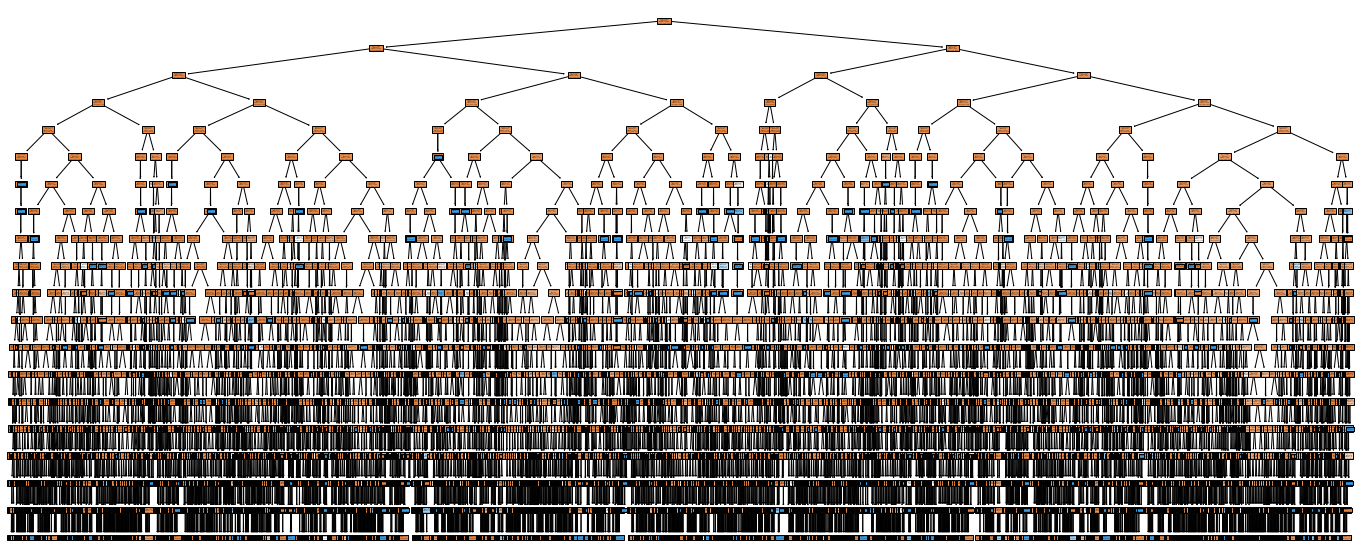

In [74]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,10))
plot_tree(DTC1, filled=True)

**Accuracy score**

1- KNN - 68%

2- Logistic Regression- 63%

3- Decision Tree (Entropy) - 92%

4- Decision Tree with hyperparameter GSCV - 89%